<center> 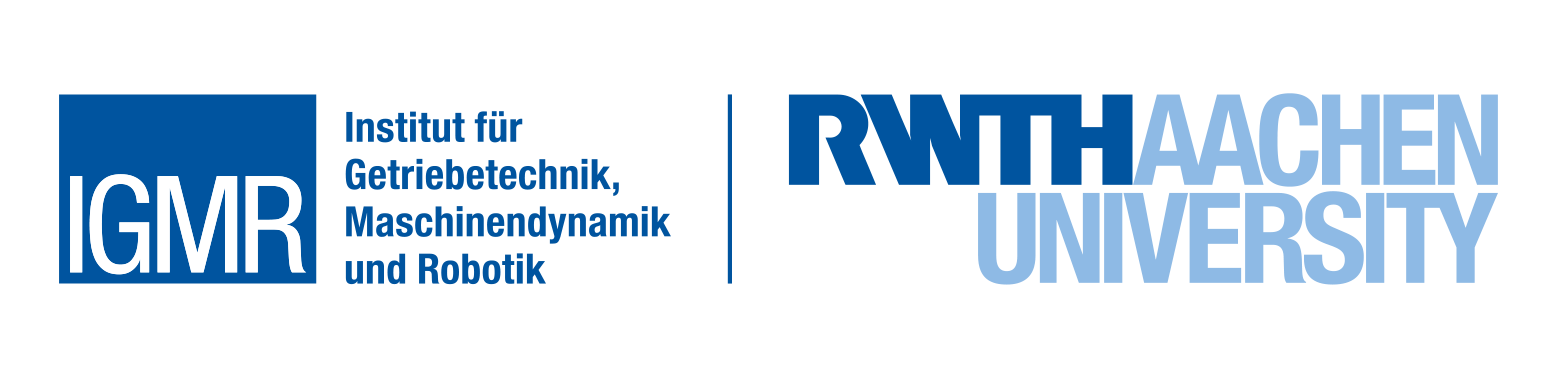 </center>
<center>
    <h1>Grundlagen der Maschinen- und Strukturdynamik</h1>
    <h1>Dynamikspielwiese</h1>
</center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Label, fixed
import ipywidgets as widgets
from functions import comp_solution

%matplotlib widget

<div style="text-align:left">
  <h2>One Mass System - Third Case</h2>
</div>
In this script `omega_0` and `delta` can be changed over slider.
Here also the combination of the homogeneous and the partikular part can be seen.
In this skript no numerical solution is possible to select.

If you run into errors, rerun the script again.

In [1]:
# create slider
omega_0 = widgets.FloatSlider(min=-10, max=10, step=0.1, value=2)
delta = widgets.FloatSlider(min=-10, max=10, step=0.1, value=1)
f_hat = widgets.FloatSlider(min=-20, max=20, step=1, value=10)
Omega = widgets.FloatSlider(min=-20, max=20, step=1, value=2)

# label and layout for slider
label = widgets.VBox([Label('Omega_0 [rad/s]:'), Label('Delta [1/s]:'),
                      Label('F_hat [Ns/m]:'), Label('Omega [rad/s]:')])
sliders = widgets.VBox([omega_0, delta,
                        f_hat, Omega])
ui = widgets.HBox([label, sliders])

Output()

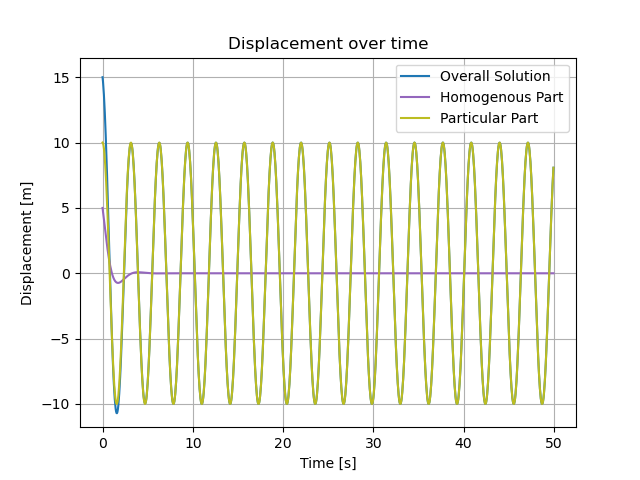

In [2]:
# define time array
T_END = 50  # stop time of simulation
T_SAMPLE = 0.05  # how fine you want the time frame

t = np.arange(0, T_END, T_SAMPLE)

# initial values for displacement and velocity
x_init = 5
x_dot_init = -1

# create figure for plots
fig = plt.figure()
ax = fig.add_subplot()
ax.grid(True)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Displacement [m]")
ax.set_title("Displacement over time")


def update(omega_0_updated, delta_updated, f_hat_updated, Omega_updated, time):
    """ Returns the updated values form the slider values evaluated."""
    ax.lines.clear()
    param = {'omega_0': omega_0_updated, 'delta': delta_updated,
             'x_0': x_init, 'x_dot_0': x_dot_init,
             'f_hat': f_hat_updated, 'Omega': Omega_updated, 'time': time}
    sol = comp_solution(param, "analytical")
    ax.plot(time, sol[0], color='C0', label="Overall Solution")
    ax.plot(time, sol[1], color='C4', label="Homogenous Part")
    ax.plot(time, sol[2], color='C8', label="Particular Part")
    ax.set_ylim([np.nanmin(sol)*1.1, np.nanmax(sol)*1.1])
    ax.legend()
    ax.set_title("Displacement over time")


out = widgets.interactive_output(update,
                                 {'omega_0_updated': omega_0, 'delta_updated': delta,
                                  'f_hat_updated': f_hat, 'Omega_updated': Omega, 'time': fixed(t)})
display(ui, out)